In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Provide the full path to your file
file_path = "/Users/Alfonso/Desktop/ReportHistory.xlsx"
trades_df = pd.read_excel(file_path, engine='openpyxl')

In [106]:
trades_df.head()

,Time,Position,Symbol,Type,Volume,Price,S / L,T / P,Time.1,Price.1,Commission,Swap,Profit
0,2023.08.17 17:26:08,81487505,USDCAD,sell,0.2,1.35103,1.35165,NaN,2023.08.17 17:28:43,1.35126,-0.8,0.0,-3.40
1,2023.08.17 17:33:44,81489007,USDCAD,sell,0.6,1.35159,1.35189,1.34999,2023.08.17 17:37:44,1.35190,-2.4,0.0,-13.76
2,2023.08.17 20:06:19,81510845,USDCAD,sell,0.6,1.35259,1.35276,NaN,2023.08.17 20:06:42,1.35278,-2.4,0.0,-8.43
3,2023.08.17 20:07:45,81511030,USDCAD,sell,0.6,1.35266,1.35268,NaN,2023.08.17 20:21:15,1.35268,-2.4,0.0,-0.89
4,2023.08.17 20:08:41,81511107,EURUSD,buy,0.6,1.08737,1.08696,NaN,2023.08.17 20:19:37,1.08700,-2.4,0.0,-22.20


## Key Performance Metrics

In [107]:
# Calculate the "Cumulative Profit" column
trades_df["Cumulative Profit"] = trades_df["Profit"].cumsum()

# Calculating parameters
total_trades = len(trades_df)
total_win_trades = len(trades_df[trades_df["Profit"] > 0])
total_loss_trades = len(trades_df[trades_df["Profit"] < 0])
win_rate = (total_win_trades / total_trades) * 100
loss_rate = (total_loss_trades / total_trades) * 100
avg_win = trades_df[trades_df["Profit"] > 0]["Profit"].mean()
avg_loss = trades_df[trades_df["Profit"] < 0]["Profit"].mean()
profit_factor = abs(trades_df["Profit"].sum() / trades_df[trades_df["Profit"] < 0]["Profit"].sum())
max_drawdown = trades_df["Cumulative Profit"].diff().min()  # Corrected the max_drawdown calculation

# Displaying the table
table_data = {
    'Total Trades': total_trades,
    'Total Winning Trades': total_win_trades,
    'Total Losing Trades': total_loss_trades,
    'Win Rate (%)': win_rate,
    'Loss Rate (%)': loss_rate,
    'Average Winning Trade': avg_win,
    'Average Losing Trade': avg_loss,
    'Profit Factor': profit_factor,
    'Maximum Drawdown': max_drawdown
}
# Calculate risk/reward ratio
risk_reward_ratio = abs(avg_win / avg_loss)

# Update the table_data dictionary to include the risk/reward ratio
table_data['Risk/Reward Ratio'] = risk_reward_ratio

table_df = pd.DataFrame.from_dict(table_data, orient='index', columns=['Value'])
table_df


,Value
Total Trades,206.000000
Total Winning Trades,57.000000
Total Losing Trades,148.000000
Win Rate (%),27.669903
Loss Rate (%),71.844660
Average Winning Trade,151.883860
Average Losing Trade,-43.361622
Profit Factor,0.349023
Maximum Drawdown,-182.400000
Risk/Reward Ratio,3.502726


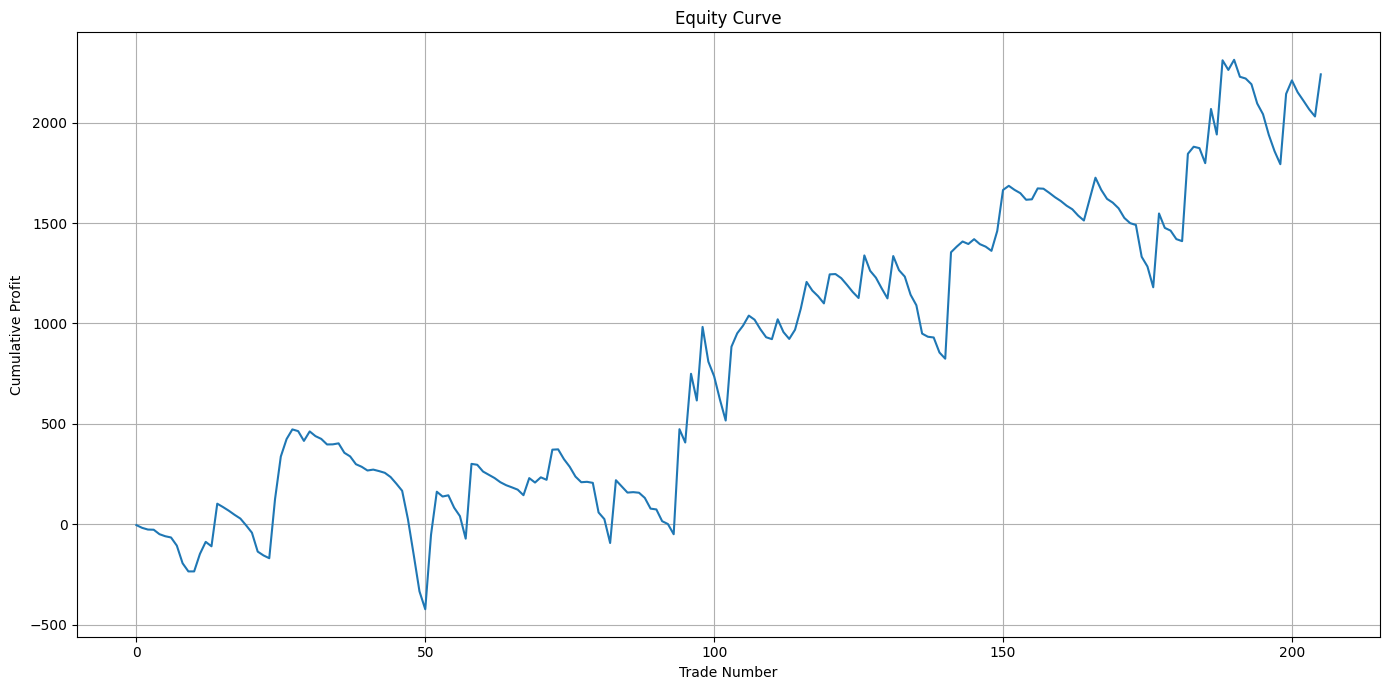

In [108]:
# Plotting the equity curve
plt.figure(figsize=(14, 7))
trades_df["Cumulative Profit"].plot()
plt.title("Equity Curve")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


## Percentage of Winning and Losing Trades by Trade Type with Average Profit/Loss

### This pie chart provides a visual representation of the percentages of winning and losing trades divided by long (buy) and short (sell) trades. Additionally, the average profit/loss for each segment is displayed.


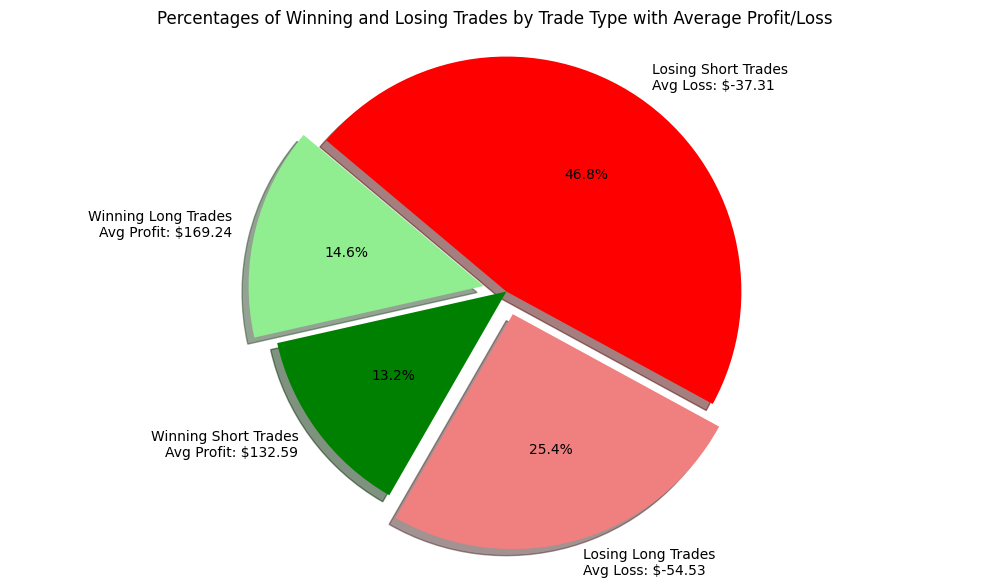

In [109]:
# Calculating the percentage of winning and losing trades for long (buy) and short (sell) trades
winning_long_percentage = len(trades_df[(trades_df['Profit'] > 0) & (trades_df['Type'] == 'buy')]) / len(trades_df) * 100
losing_long_percentage = len(trades_df[(trades_df['Profit'] < 0) & (trades_df['Type'] == 'buy')]) / len(trades_df) * 100
winning_short_percentage = len(trades_df[(trades_df['Profit'] > 0) & (trades_df['Type'] == 'sell')]) / len(trades_df) * 100
losing_short_percentage = len(trades_df[(trades_df['Profit'] < 0) & (trades_df['Type'] == 'sell')]) / len(trades_df) * 100

# Calculating average profit/loss for each category
average_profit_long = trades_df[(trades_df['Profit'] > 0) & (trades_df['Type'] == 'buy')]['Profit'].mean()
average_loss_long = trades_df[(trades_df['Profit'] < 0) & (trades_df['Type'] == 'buy')]['Profit'].mean()
average_profit_short = trades_df[(trades_df['Profit'] > 0) & (trades_df['Type'] == 'sell')]['Profit'].mean()
average_loss_short = trades_df[(trades_df['Profit'] < 0) & (trades_df['Type'] == 'sell')]['Profit'].mean()

# Data for the pie chart with average profit/loss values included in the labels
labels_with_avg = [
    f'Winning Long Trades\nAvg Profit: ${average_profit_long:.2f}',
    f'Winning Short Trades\nAvg Profit: ${average_profit_short:.2f}',
    f'Losing Long Trades\nAvg Loss: ${average_loss_long:.2f}',
    f'Losing Short Trades\nAvg Loss: ${average_loss_short:.2f}'
]
sizes = [winning_long_percentage, winning_short_percentage, losing_long_percentage, losing_short_percentage]
colors = ['lightgreen', 'green', 'lightcoral', 'red']
explode = (0.1, 0, 0.1, 0)  # explode 1st and 3rd slice for emphasis

# Plotting the pie chart with average profit/loss values
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels_with_avg, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentages of Winning and Losing Trades by Trade Type with Average Profit/Loss")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()




## Distribution of Trades by Profit/Loss

### The histogram below displays the distribution of trades based on profit/loss amounts. This visualization provides insights into the frequency of different profit and loss magnitudes in the trader's record.


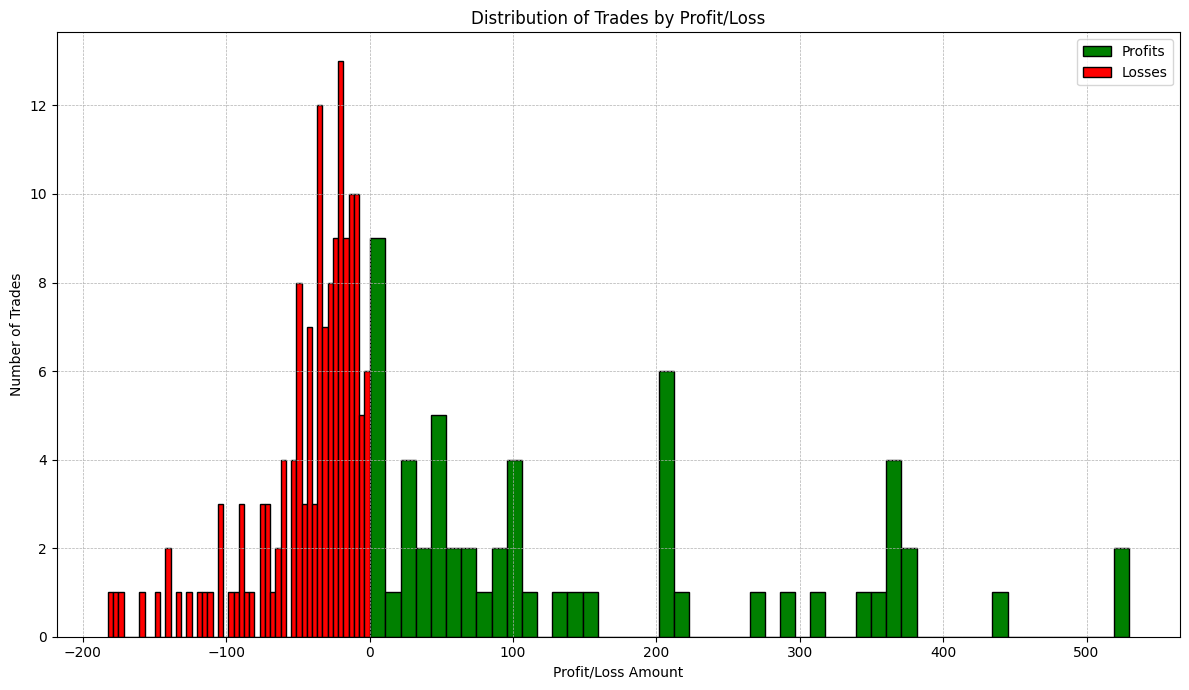

In [110]:
# Plotting the Distribution of Trades by Profit/Loss with distinct colors
plt.figure(figsize=(12, 7))

# Separate data for profits and losses
profits = trades_df[trades_df["Profit"] > 0]["Profit"]
losses = trades_df[trades_df["Profit"] <= 0]["Profit"]

# Plot histograms for profits and losses with distinct colors
plt.hist(profits, bins=50, color='green', edgecolor='black', label='Profits')
plt.hist(losses, bins=50, color='red', edgecolor='black', label='Losses')

plt.title("Distribution of Trades by Profit/Loss")
plt.xlabel("Profit/Loss Amount")
plt.ylabel("Number of Trades")
plt.legend(loc="upper right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



## A histogram where each bar represents a day of the week and is segmented by asset class, showing the profit or loss for each asset class on each day.

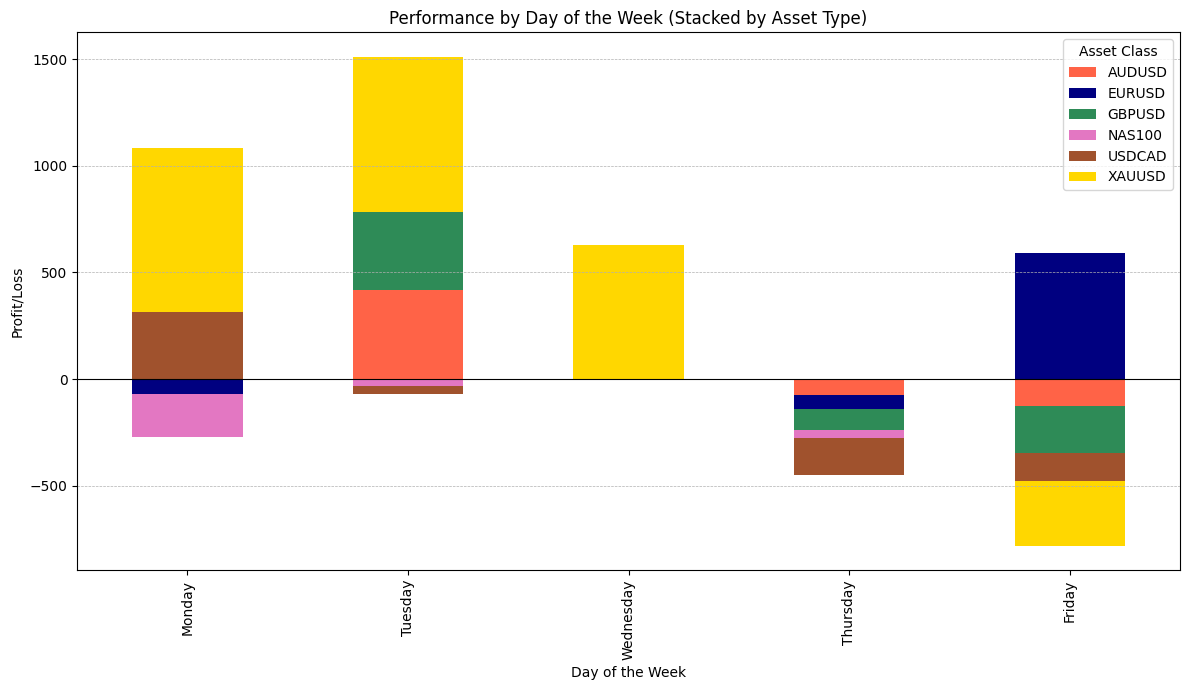

In [111]:
# Convert the 'Time' column to a datetime format
trades_df['Time'] = pd.to_datetime(trades_df['Time'], format='%Y.%m.%d %H:%M:%S')

# Extracting the day of the week from the 'Time' column
trades_df['Day'] = trades_df['Time'].dt.day_name()

# Grouping by day and asset class
grouped = trades_df.groupby(['Day', 'Symbol'])['Profit'].sum().unstack().fillna(0)

# Ordering the days of the week
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
grouped = grouped.reindex(ordered_days)

# Color dictionary 
colors_dict = {
    'EURUSD': 'navy',
    'XAUUSD': 'gold',
    'AUDUSD': 'tomato',
    'GBPUSD': 'seagreen',
    'USDCAD': 'sienna'
}

# If there are other assets for which you haven't specified a color, we'll default to using the colors from the 'tab10' colormap
default_colors = plt.cm.tab10(np.linspace(0, 1, len(grouped.columns)))
for default_color, column in zip(default_colors, grouped.columns):
    if column not in colors_dict:
        colors_dict[column] = default_color

# Create a color list in the order of the columns
colors_list = [colors_dict[col] for col in grouped.columns]

# Plotting the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors_list)
plt.title('Performance by Day of the Week (Stacked by Asset Type)')
plt.ylabel('Profit/Loss')
plt.xlabel('Day of the Week')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.legend(title="Asset Class")  # Displaying the legend to show colors for each asset class
plt.tight_layout()
plt.show()



In [114]:
# Get the indices of the top 10 biggest losses in the original DataFrame
top_10_losses_indices = trades_df.nsmallest(10, 'Profit').index

# Lists to store the results
loss_times = []
loss_amounts = []
preceding_trades_list = []
wins_counts = []
losses_counts = []

for idx in top_10_losses_indices:
    # Get the loss amount and time
    loss_amount = trades_df.loc[idx, 'Profit']
    loss_time = trades_df.loc[idx, 'Time']
    loss_amounts.append(loss_amount)
    loss_times.append(loss_time)

    # Get up to 5 preceding trades
    start_idx = max(0, idx - 5)
    trades_before = trades_df.iloc[start_idx:idx]['Profit'].tolist()
    preceding_trades_list.append(trades_before)

    # Count wins and losses
    wins_counts.append(sum([1 for trade in trades_before if trade > 0]))
    losses_counts.append(sum([1 for trade in trades_before if trade < 0]))

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Time of Loss': loss_times,
    'Biggest Loss': loss_amounts,
    '5th Trade Before': [trades[-5] if len(trades) >= 5 else None for trades in preceding_trades_list],
    '4th Trade Before': [trades[-4] if len(trades) >= 4 else None for trades in preceding_trades_list],
    '3rd Trade Before': [trades[-3] if len(trades) >= 3 else None for trades in preceding_trades_list],
    '2nd Trade Before': [trades[-2] if len(trades) >= 2 else None for trades in preceding_trades_list],
    '1st Trade Before': [trades[-1] if len(trades) >= 1 else None for trades in preceding_trades_list]
    #'Wins in Last 5 Trades': wins_counts,
    #'Losses in Last 5 Trades': losses_counts
})

# Reorder the columns
reordered_columns = [
    'Time of Loss',
    'Biggest Loss',
    '1st Trade Before',
    '2nd Trade Before',
    '3rd Trade Before',
    '4th Trade Before',
    '5th Trade Before'
    #'Wins in Last 5 Trades',
   # 'Losses in Last 5 Trades'
]
result_df = result_df[reordered_columns]

# Highlight cells based on conditions
def highlight_cells(cell):
    if isinstance(cell, (int, float)):
        if cell < 2 * avg_loss:
            return 'background-color: red'
        elif cell > 2 * avg_win:
            return 'background-color: green'
    return ''

def highlight_negative_values(cell):
    if isinstance(cell, (int, float)) and cell < 0:
        return 'background-color: lightcoral'
    return ''

def bold_biggest_loss(cell):
    if isinstance(cell, (int, float)) and cell < 2 * avg_loss:
        return 'font-weight: bold'
    return ''

# Convert 'Time of Loss' to datetime format
result_df['Time of Loss'] = pd.to_datetime(result_df['Time of Loss'])

# Format the 'Time of Loss' column
result_df['Time of Loss'] = result_df['Time of Loss'].dt.strftime('%A, %Y-%m-%d %H:%M:%S')

# Apply the styles
styled_df = result_df.style.applymap(highlight_cells, subset=['Biggest Loss', '1st Trade Before', '2nd Trade Before', '3rd Trade Before', '4th Trade Before', '5th Trade Before'])
styled_df = styled_df.applymap(bold_biggest_loss, subset=['Biggest Loss'])
styled_df = styled_df.applymap(highlight_negative_values, subset=['1st Trade Before', '2nd Trade Before', '3rd Trade Before', '4th Trade Before', '5th Trade Before'])
styled_df.set_caption("Risk Management")


,Time of Loss,Biggest Loss,1st Trade Before,2nd Trade Before,3rd Trade Before,4th Trade Before,5th Trade Before
0,"Friday, 2023-08-25 16:25:04",-182.400000,-177.200000,-141.000000,-35.310000,-33.130000,-20.980000
1,"Friday, 2023-08-25 16:24:09",-177.200000,-141.000000,-35.310000,-33.130000,-20.980000,-8.610000
2,"Friday, 2023-10-13 17:33:27",-172.800000,366.000000,-132.800000,342.000000,-66.300000,522.880000
3,"Friday, 2023-09-29 16:22:15",-158.400000,-9.000000,-26.000000,-48.000000,-28.000000,-18.900000
4,"Friday, 2023-09-29 16:22:37",-147.400000,-5.200000,2.000000,-28.000000,-49.000000,-38.000000
5,"Wednesday, 2023-10-18 16:45:49",-141.200000,-52.400000,-90.000000,-32.000000,-70.400000,210.800000
6,"Friday, 2023-08-25 16:23:39",-141.000000,-35.310000,-33.130000,-20.980000,-8.610000,-7.360000
7,"Wednesday, 2023-10-11 16:21:35",-132.800000,342.000000,-66.300000,522.880000,-50.800000,-14.200000
8,"Wednesday, 2023-10-11 16:16:45",-126.800000,269.600000,-74.700000,-7.110000,35.160000,434.800000
9,"Friday, 2023-09-29 16:35:13",-118.800000,-33.000000,-147.400000,-5.200000,2.000000,-28.000000


### · Negative Streak: For the biggest losses, I notice a streak of negative trades leading up to the biggest loss. This could indicate that I might be letting emotions drive trading decisions, possibly trying to "make up" for previous losses by taking on more risk, which is a common behavioral pitfall known as the "revenge trading" phenomenon.

### · Day of the Week: Most of the losses occurred on a Friday. This could be coincidental, but it might also be worth investigating if there's a pattern or specific market conditions on Fridays that the trader struggles with.

### · Positive Trades Before Big Losses: In some instances, like on 2023-10-13 17:33:27 and 2023-10-11 16:21:35, there were significant gains just before the large losses. It's crucial to ensure that profits from winning trades aren't given back too quickly due to poor risk management on subsequent trades.

### · Risk Management: A foundational aspect of trading is to ensure that no single trade can significantly impact the overall account balance. If these losses represent a large percentage of the account, then the trader might be risking too much per trade.

##### Colors in charts.

In [113]:
# Get the list of named colors in matplotlib
named_colors = list(matplotlib.colors.cnames.keys())

# Display the named colors
for color in named_colors:
    print(color)

# Plotting a color swatch with wider lines
#fig, ax = plt.subplots(1, figsize=(12, 1.1*len(named_colors)),  # Adjusted the height based on the number of colors
 #                       subplot_kw=dict(xticks=[],
  #                                      yticks=[],
  #                                      frame_on=False))
#for spine in ax.spines.values():
 #   spine.set_visible(False)

# Displaying the color names with their respective colors
#spacing = 2  # Adjusted spacing for wider lines
# for i, color in enumerate(named_colors):
  #  ax.fill_betweenx([i*spacing, i*spacing + spacing], 0, 1, color=color)
#ax.text(0.01, i*spacing + spacing/2, color, fontdict={'size': 10}, color="black", va='center', ha='left')

#ax.set_xlim(0, 1)
#ax.set_ylim(0, len(named_colors)*spacing)
#plt.show()


aliceblue
antiquewhite
aqua
aquamarine
azure
beige
bisque
black
blanchedalmond
blue
blueviolet
brown
burlywood
cadetblue
chartreuse
chocolate
coral
cornflowerblue
cornsilk
crimson
cyan
darkblue
darkcyan
darkgoldenrod
darkgray
darkgreen
darkgrey
darkkhaki
darkmagenta
darkolivegreen
darkorange
darkorchid
darkred
darksalmon
darkseagreen
darkslateblue
darkslategray
darkslategrey
darkturquoise
darkviolet
deeppink
deepskyblue
dimgray
dimgrey
dodgerblue
firebrick
floralwhite
forestgreen
fuchsia
gainsboro
ghostwhite
gold
goldenrod
gray
green
greenyellow
grey
honeydew
hotpink
indianred
indigo
ivory
khaki
lavender
lavenderblush
lawngreen
lemonchiffon
lightblue
lightcoral
lightcyan
lightgoldenrodyellow
lightgray
lightgreen
lightgrey
lightpink
lightsalmon
lightseagreen
lightskyblue
lightslategray
lightslategrey
lightsteelblue
lightyellow
lime
limegreen
linen
magenta
maroon
mediumaquamarine
mediumblue
mediumorchid
mediumpurple
mediumseagreen
mediumslateblue
mediumspringgreen
mediumturquoise
mediumv